In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt

import sys
import os
import glob
sys.path.append('./my_funcs')
%load_ext autoreload
%autoreload 2

import my_funcs.step1_funcs as step1
import my_funcs.step2_funcs as step2
import my_funcs.step4_funcs as step4

# Step 1: Check misfit

# Step 2: Create necessary files for HASH

In [14]:
research_dir = '../..'
event_id = "nc51183469"
folder_station = f'{research_dir}/FocalMechanism/OutputData/{event_id}'
filename_picks = f'{folder_station}/markers/event_picks.txt'
filename_event = 'event.txt'

outfile = 'MTJ.phase'
step2.snuffler_to_HASH(filename_event, folder_station, filename_picks, outfile)

outfile = 'MTJ.reverse'
step2.create_sta_reverse(folder_station, outfile)

outfile = 'MTJ.stations'
step2.create_stations_5char(folder_station, outfile)

ev_df = pd.read_csv(filename_event, sep='\s+')
event_id = ev_df["EVID"][0]
print(event_id)

nc51183469


# Step 3: Run HASH with input file
This will produce a 'test.out' file, which contains all the focal mechanism parameteres. \
It also outputs a test2.out with auxiliary focalmechanism solutions. \
To change the name of the output file, edit the input file (example2-MTJ.inp)

In [15]:
# Run this in the terminal: ../hash_driver2_5letter<example2_MTJ.inp
# compile the fortran code if needed in the original HASH_v1.2_correction folder
# then copy the executable to the current folder (without the .f)
# mdarifulislam example_Arif % sh step3_run_hash.sh (in the terminal)

os.system('sh step3_run_hash.sh') 
# print(os.system('pwd'))


 Enter station list file
 Enter station polarity reversal file
 Enter name of input file (FPFIT-like format)
 Enter output file name for focal mechanisms
 Enter output file name for acceptable planes
 Enter mininum number of polarities (e.g., 8)
 Enter maximum azimuthal gap (e.g., 90)
 Enter maximum takeoff angle gap (e.g., 60)
 Enter grid angle for focal mech search, in degrees         (min    5.00000000     )
 Enter number of trials (e.g., 30)
 Enter maxout for focal mech. output (e.g., 500)
 Enter fraction of picks presumed bad (e.g., 0.10)
 Enter maximum allowed source-station distance,                    in km (e.g., 120)
 Enter angle for computing mechanisms probability,                 in degrees (e.g., 45)
 Enter probability threshold for multiples (e.g., 0.1)
 Enter number of velocity models (max           10 )
 Enter file name for velocity model            1
 Enter file name for velocity model            2
 Enter file name for velocity model            3
 Enter file name for 

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


0

# Step 4: HASH plotting

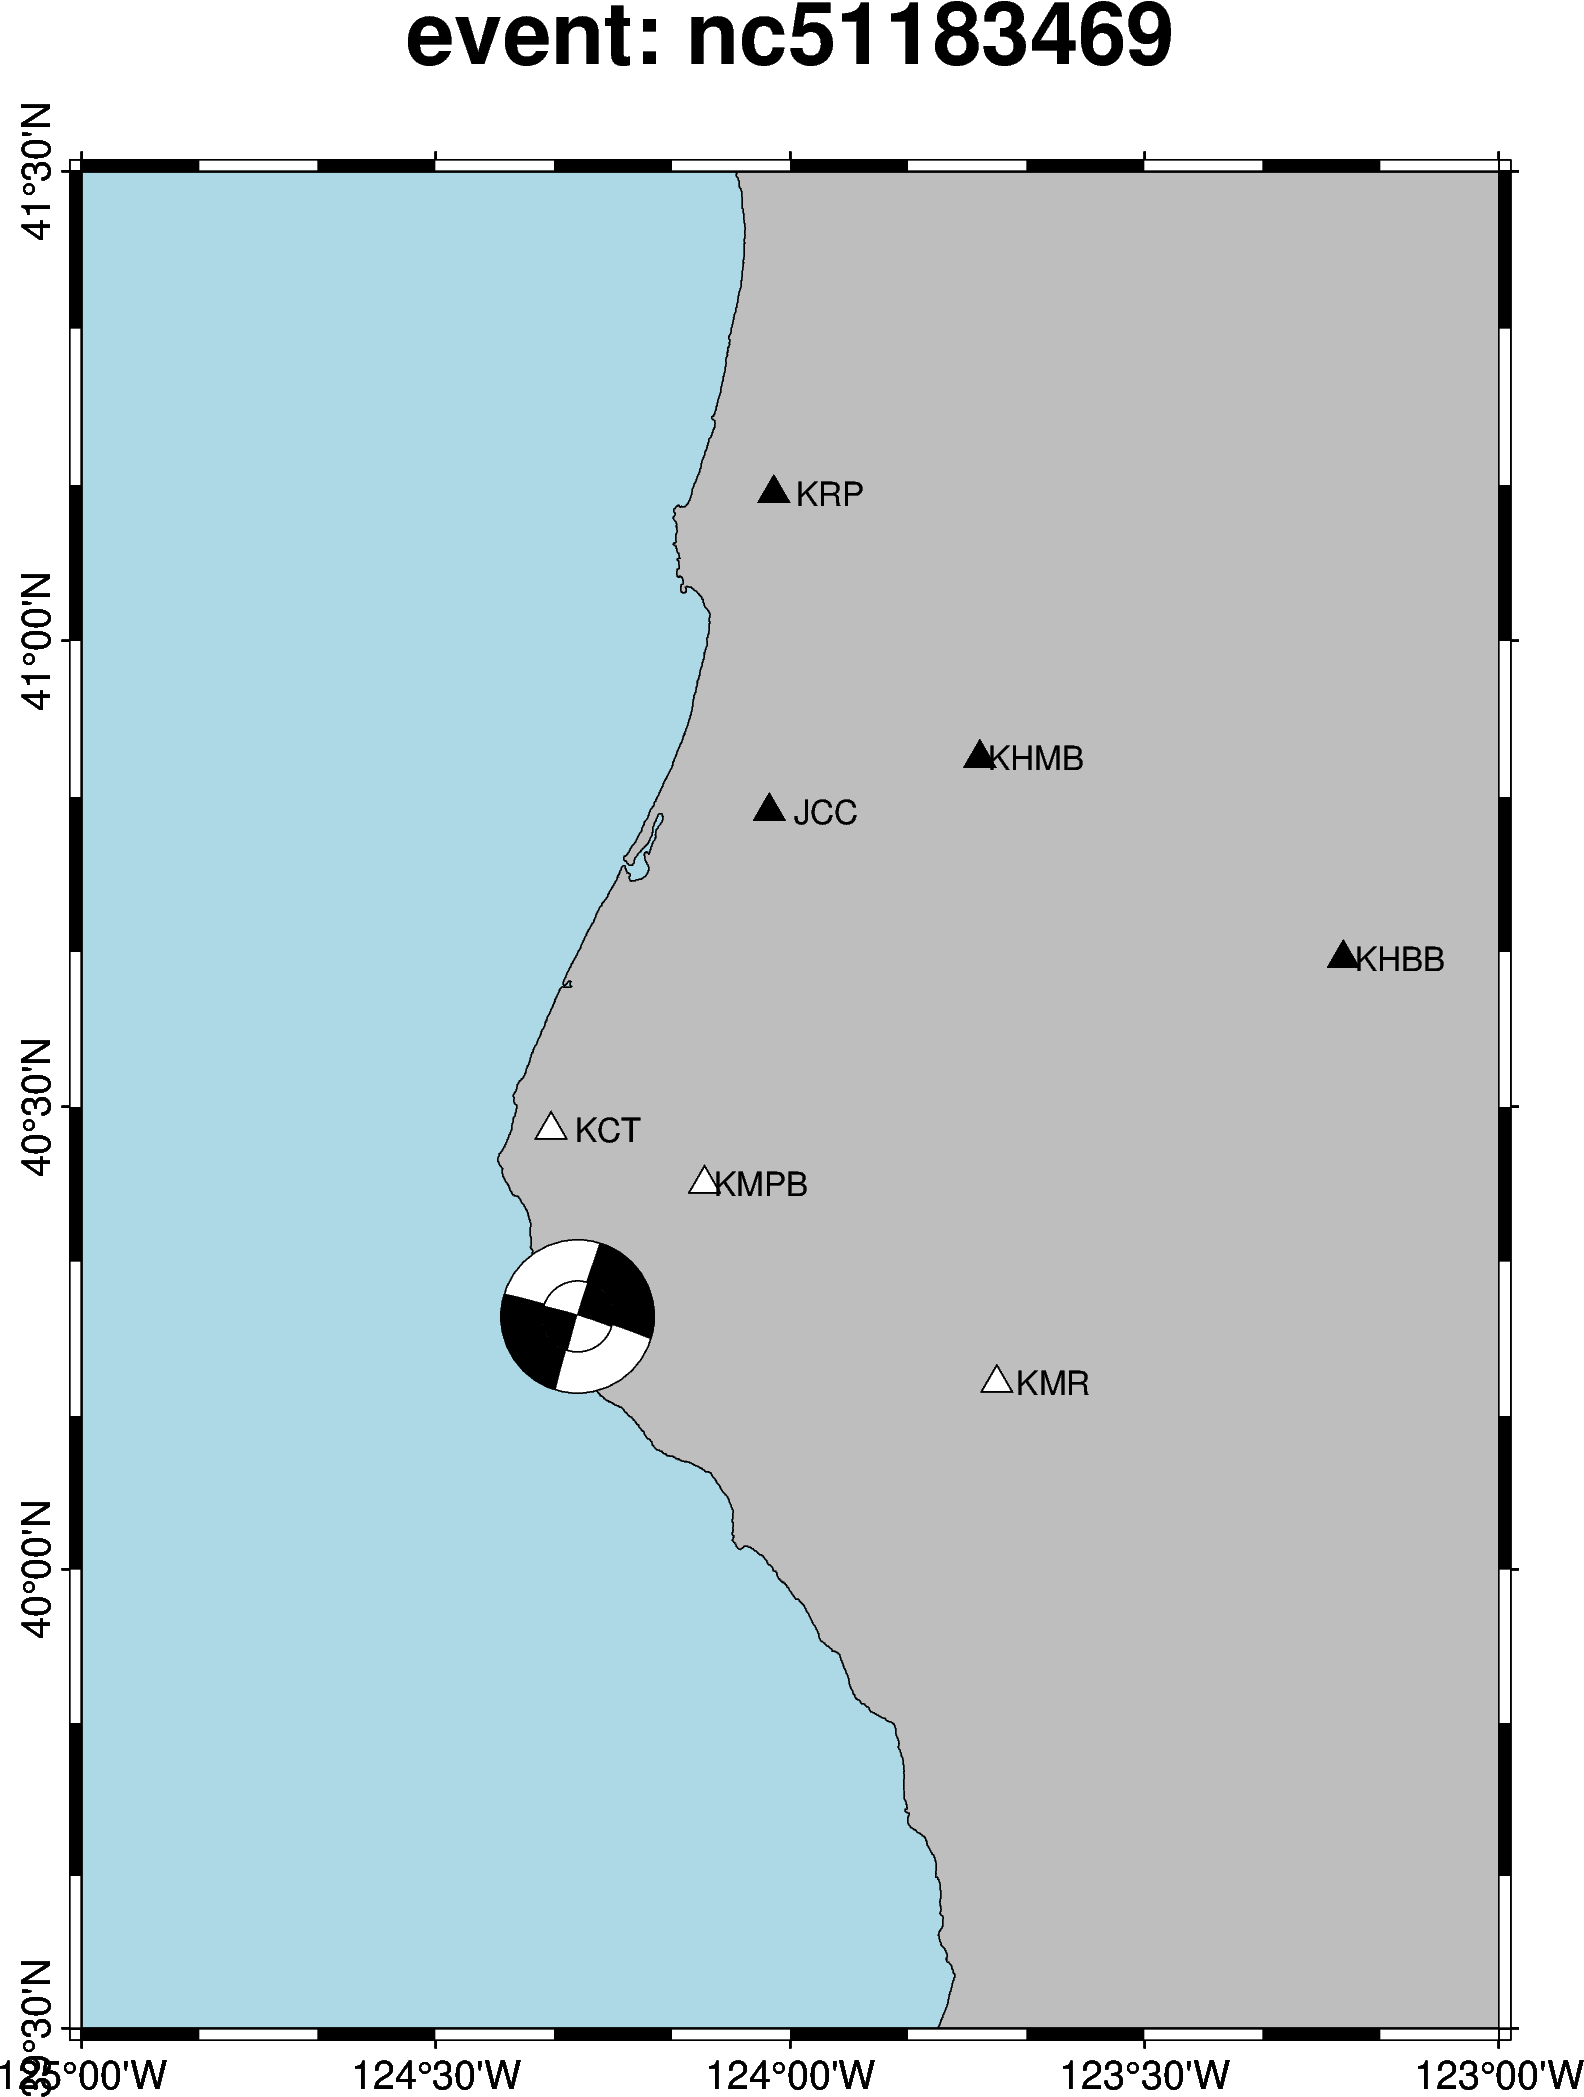

In [16]:
filename = 'test2.out'
# read the output file using our function `read_output1`
df = step4.read_output1('test2.out', amp=False)
strike, dip, rake, elat, elon, edep = df['strike'][0], df['dip'][0], df['rake'][0], df['elat'][0], df['elon'][0], df['edep'][0]
folder_station = folder_station
stanames_all, latlon_all = step4.get_sta_latlon(folder_station)

filename_polarity = filename_picks
polarities, stanames = step4.get_polarity(filename_polarity, folder_station, ['Latitude','Longitude'])

# plot
region = [-125, -123, 39.5, 41.5]

# plot the focal mechanism
fig = step4.plot_focal(region, strike, dip, rake, elat, elon, edep, magnitude=6.5)

# plot all the stations
fig.plot(x=latlon_all[:,1], 
        y=latlon_all[:,0], 
        style="t0.3c", 
        fill="grey", 
        pen="black"
        )

# plot the polarity based triangles, black for compressional, white for dilatational
for i in range(0, len(stanames)):
    if polarities[i, 0] == 1: # positive polarity, compressional wave, filled circle
        fig.plot(x=polarities[i, 2], y=polarities[i, 1], style="t0.3c", fill='black', pen='black')

    elif polarities[i, 0] == -1: # negative polarity, dilatational wave, open circle
        fig.plot(x=polarities[i, 2], y= polarities[i, 1], style="t0.3c", fill='white', pen='black')



# plot the station names
fig.text(x=latlon_all[:,1]+0.08, y=latlon_all[:,0],text=stanames_all, font='8p')

# overlay the focal mechanism again to keep it on top
# pass the focal mechanism data to meca in addition to the scale and event location
focal_mechanism = dict(strike=strike, dip=dip, rake=rake, magnitude=3)
fig.meca(focal_mechanism, scale="1c", longitude=elon, latitude=elat, depth=edep)

# title and axis label of the plot
fig.basemap(frame=[f"+tevent: {event_id}"])

fig.savefig(f'png/Focal_mechanism_{event_id}.png')

fig.show()

# Save it with event name for later use
All the following files will be replaced for a new event. \
So, rename them and store them in a folder.

In [21]:
if not os.path.exists("foc_mech_solution"):
    os.makedirs("foc_mech_solution")
    # copy and rename the output file
os.system(f'cp event.txt foc_mech_solution/{event_id}_event.txt')
os.system(f'cp {filename} foc_mech_solution/{event_id}_{filename}')
os.system(f'cp {filename_event} foc_mech_solution/{event_id}_{filename_event}')
os.system(f'cp MTJ.phase foc_mech_solution/{event_id}_MTJ.phase')
os.system(f'cp MTJ.reverse foc_mech_solution/{event_id}_MTJ.reverse')
os.system(f'cp MTJ.stations foc_mech_solution/{event_id}_MTJ.stations')

    # os.system(f'rm {filename} {filename_event} MTJ.phase MTJ.reverse MTJ.stations')

0